# SC11x

## Data Preprocessing & Exploratory Data Analysis

## Data Preprocessing

이번 파트에서는 [Gapminder](https://www.gapminder.org/about-gapminder/)의 데이터를 다루게 됩니다.

데이터는 3가지로 구성되어 있으며 description은 다음과 같습니다.

- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv>

### data1

|geo|time|cell_phones_total|
|:-:|:-:|:-:|
|kor|2017|63658688|
|kor|2018|66355778|
|kor|2019|68892541|

- 지역, 연도, 통화수

### data2

|geo|time|population|
|:-:|:-:|:-:|
|kor|2017|51096415|
|kor|2018|51171706|
|kor|2019|51225308|

- 지역, 연도, 인구수

### data3

|geo|country|
|:-:|:-:|
|kor|South Korea|

- 지역, 나라 이름

### 1. Load and Explore the Data

- 데이터셋을 데이터프레임으로 불러오세요.
- 결측데이터를 확인하세요.
- `time` vs `cell_phones_total`에 대해서 `scatter plot`을 그리세요.


In [1]:
import pandas as pd

data1_url = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv"
data2_url = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv"
data3_url = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv"

# 데이터셋을 데이터프레임으로 불러오기
df1 = pd.read_csv(data1_url, index_col=0)
df2 = pd.read_csv(data2_url, index_col=0)
df3 = pd.read_csv(data3_url, index_col=0)
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df1.head())
print(df2.head())
print(df3.head())

(9574, 3)
(35334, 3)
(273, 2)
   geo  time  cell_phones_total
0  abw  1960                0.0
1  abw  1965                0.0
2  abw  1970                0.0
3  abw  1975                0.0
4  abw  1976                0.0
   geo  time  population
0  abw  1950       38068
1  abw  1951       38267
2  abw  1952       38964
3  abw  1953       40148
4  abw  1954       41760
    geo      country
0  abkh     Abkhazia
1   abw        Aruba
2   afg  Afghanistan
3   ago       Angola
4   aia     Anguilla


In [2]:
# 결측데이터 확인
print(df1.isna().sum())
print(df2.isna().sum())
print(df3.isna().sum())

geo                  0
time                 0
cell_phones_total    0
dtype: int64
geo           0
time          0
population    0
dtype: int64
geo        0
country    0
dtype: int64


In [3]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도

mpl.rcParams['axes.unicode_minus'] = False # 마이너스 기호 오류 해결

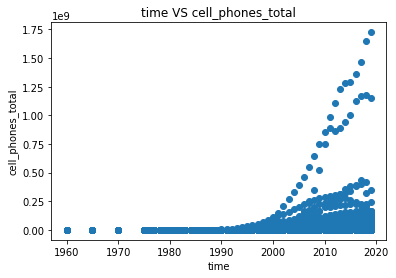

In [4]:
# time vs cell_phones_total에 대해서 scatter plot 그리기
plt.scatter(df1['time'], df1['cell_phones_total'])
plt.title('time VS cell_phones_total')
plt.xlabel('time')
plt.ylabel('cell_phones_total')
plt.show()

### 2. Join data

다음 데이터를 만드세요. (shape = 9568 * 5)

|geo|time|cell_phones_total|population|country|
|:-:|:-:|:-:|:-:|:-:|
|abw|1960|0|54211|Aruba|
|...|...|...|...|...|
|zwe|2019|13195902.0|14645468|Zimbabwe|


In [5]:
df_merged = pd.merge(df1, df2)
df_merged = pd.merge(df_merged, df3)
print(df_merged.shape)
df_merged.head()

(9568, 5)


,geo,time,cell_phones_total,population,country
0,abw,1960,0.0,54211,Aruba
1,abw,1965,0.0,57360,Aruba
2,abw,1970,0.0,59063,Aruba
3,abw,1975,0.0,60657,Aruba
4,abw,1976,0.0,60586,Aruba


In [6]:
df_merged.tail()

,geo,time,cell_phones_total,population,country
9563,zwe,2015,12757410.0,13814629,Zimbabwe
9564,zwe,2016,12878926.0,14030331,Zimbabwe
9565,zwe,2017,14092104.0,14236595,Zimbabwe
9566,zwe,2018,12908992.0,14438802,Zimbabwe
9567,zwe,2019,13195902.0,14645468,Zimbabwe


### 3. Feature Engineering

인구당 cell phone의 수를 표기한 `PPP`라는 feature를 추가하세요. 

그 결과로 2019년 한국에서 PPP가 1.3448이 나와야 합니다. (해당 내역을 보여주세요.)

In [7]:
# 인구당 휴대 전화 수 = 전체 휴대 전화 수 / 인구 수
df_merged['PPP'] = df_merged['cell_phones_total'] / df_merged['population']

# 2019년 한국의 인구당 휴대 전화 수
df_merged.loc[(df_merged['geo'] == 'kor') & (df_merged['time'] == 2019)]

,geo,time,cell_phones_total,population,country,PPP
4805,kor,2019,68892541.0,51225308,South Korea,1.344893


### 4. Data Manipulation

각 나라별로 평균 PPP를 계산하세요.

In [8]:
df_mean_ppp = df_merged[['geo', 'PPP']].groupby('geo').mean()
# df_mean_ppp.reset_index(inplace=True)
df_mean_ppp.head()

,PPP
geo,
abw,0.384005
afg,0.133398
ago,0.124074
alb,0.324242
and,0.347083


가장 많은 PPP 값을 갖는 top 10 (geo) 를 구하세요.

다음과 비슷한 결과가 나와야 합니다. 

|geo|PPP|
|:-:|:-:|
|are|0.741916|
|sau|0.757034|
|lie|0.806225|
|hkg|0.810664|
|mac|0.818130|
|isr|0.840197|
|srb|0.951586|
|nld_curacao|1.259227|
|mne|1.574349|
|sxm|1.899506|


In [9]:
df_mean_sorted = df_mean_ppp.sort_values(by='PPP', ascending=False)
df_mean_topten = df_mean_sorted.iloc[:10, :]
df_mean_topten.sort_values(by='PPP', ascending=True)

,PPP
geo,
are,0.741916
sau,0.757034
lie,0.806225
hkg,0.810664
mac,0.818130
isr,0.840197
srb,0.951586
nld_curacao,1.259227
mne,1.574349


## EDA
이번 파트에서는 **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)** 의 데이터를 다루게 됩니다.


아래의 코드는 이미 여러분들을 위해 준비되어 있습니다. 아래 cell 을 실행하면 자동으로 data 가 load 되며, `df`라는 이름의 dataframe 을 얻게 될 겁니다. 

(원하신다면 추가 EDA를 하셔도 상관없지만, 이번 파트에서의 요구사항은 아닙니다.)


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  #that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]
  str_date = str(date.year)+"-"+str(date.month) + "-" + str(date.day)
  that_day = merged.loc[str_date]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


아래의 그림을 따라 그리세요 :

<img src='https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png' width = 500>



여러분들이 새로 만들게 될 plot은 다음을 만족해야 합니다:
- `example`과 유사한 `Cable News` vs `Online News` 2개의 line graph가 보여야 합니다. 
- 각 라인은 각각 **다른** 색깔을 가져야 합니다. (위 `example` 과 반드시 같은 색일 필요는 없습니다)
- 타이틀을 다음 내용으로 만드세요. _"Biden's Ukraine-related media bump is fading"_


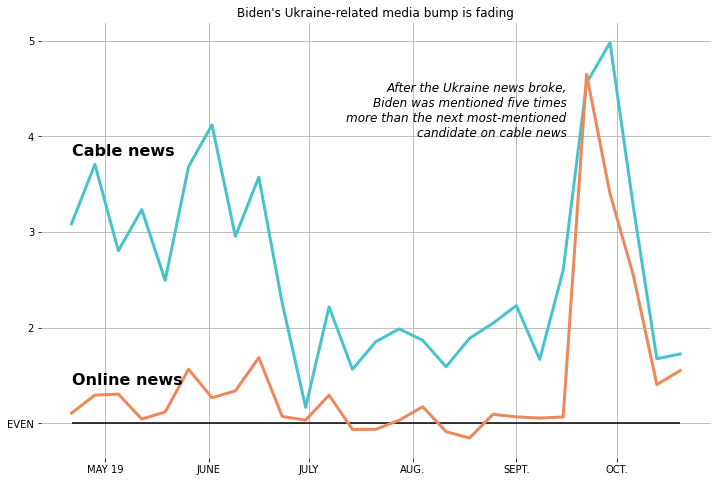

In [11]:
start = df.index.get_loc('2019-04-21')

plt.figure(figsize=(12, 8))
plt.plot(df.index[start:], df['biden_cable_multiple'][start:], label='Cable News', color='#48C3CB', linewidth=3)
plt.plot(df.index[start:], df['biden_online_multiple'][start:], label='Online News', color='#ED885B', linewidth=3)

plt.title("Biden's Ukraine-related media bump is fading")
plt.text(df.index[start], 3.8, 'Cable news', fontsize=16, weight='bold')
plt.text(df.index[start], 1.4, 'Online news', fontsize=16, weight='bold')
explain_text_xloc = 737303 + ((737333 - 737303) / 2)
plt.text(explain_text_xloc, 4, 'After the Ukraine news broke,\nBiden was mentioned five times\nmore than the next most-mentioned\ncandidate on cable news', style='italic', fontsize=12, ha='right')

plt.grid(True)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.hlines(1, df.index[start:], df.index[-1:])

xticks = [737180, 737211, 737241, 737272, 737303, 737333]
yticks = np.arange(1, 6)
plt.xticks(xticks, ['MAY 19', 'JUNE', 'JULY', 'AUG.', 'SEPT.', 'OCT.'])
plt.yticks(yticks, ['EVEN', 2, 3, 4, 5])

plt.show;

## SC 3점 요구사항:

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들중 하나를 만족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항들은 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

## 1. Data Preprocessing

- `cell_phones`dataframe 에서 필터를 걸어 USA 와 china 정보만 담게 하고, scatter plot 을 다시 그려 보세요. 

- geo code 를 lowercase가 아닌 uppercase 로 바꿔보세요. 

- 2017년은 China가 people(인구수)보다 cell phone 개수가 더 많아지는 첫번째 년도 입니다. 
미국의 경우, cell phone의 개수가 people 보다 더 많아지는 첫번째 년도는 언제인가요?

## 2. EDA

- 주어진 fivethirtyeight 그림 차트와 완벽히 동일하게 그려보세요. 


In [12]:
# 1. Data Preprocessing

# cell_phonesdataframe 에서 필터를 걸어 USA 와 china 정보만 담기
df_g1n2 = df_merged[(df_merged['geo'] == 'usa') | (df_merged['geo'] == 'chn')]
df_g1n2.reset_index(drop=True, inplace=True)
df_g1n2

,geo,time,cell_phones_total,population,country,PPP
0,chn,1960,0.0,660408056,China,0.000000
1,chn,1965,0.0,724218968,China,0.000000
2,chn,1970,0.0,827601394,China,0.000000
3,chn,1975,0.0,926240885,China,0.000000
4,chn,1976,0.0,942685411,China,0.000000
...,...,...,...,...,...,...
87,usa,2014,355500000.0,318673411,United States,1.115562
88,usa,2015,382307000.0,320878310,United States,1.191439
89,usa,2016,396000000.0,323015995,United States,1.225945
90,usa,2017,400000000.0,325084756,United States,1.230448


No handles with labels found to put in legend.


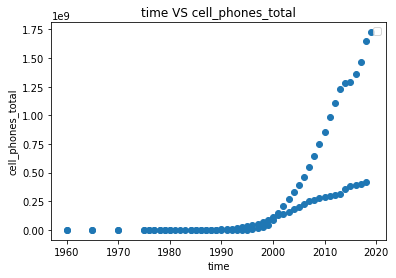

In [13]:
# scatter plot 그리기(1차)
plt.scatter(df_g1n2['time'], df_g1n2['cell_phones_total'])
plt.title('time VS cell_phones_total')
plt.xlabel('time')
plt.ylabel('cell_phones_total')
plt.legend()

plt.show()

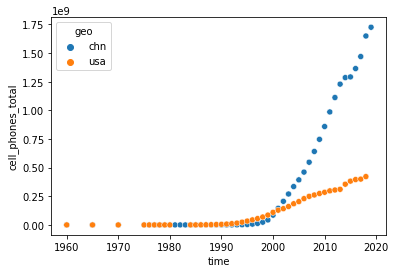

In [14]:
# scatter plot 그리기(2차)
import seaborn as sns
sns.scatterplot(data = df_g1n2,
                x = 'time', y = 'cell_phones_total',
                hue='geo') # different colors by group

plt.show();

In [15]:
# geo code 를 lowercase가 아닌 uppercase 로 바꾸기(1차)
# pd.set_option('mode.chained_assignment',  None) # SettingWithCopyWarning 에러 숨기기
# df_g1n2이 df_merged의 파생 DataFrame이므로 위 경고가 출력됨
df_g1n2['geo'] = df_g1n2['geo'].str.upper()
df_g1n2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,geo,time,cell_phones_total,population,country,PPP
0,CHN,1960,0.0,660408056,China,0.0
1,CHN,1965,0.0,724218968,China,0.0
2,CHN,1970,0.0,827601394,China,0.0
3,CHN,1975,0.0,926240885,China,0.0
4,CHN,1976,0.0,942685411,China,0.0


In [16]:
# geo code 를 lowercase가 아닌 uppercase 로 바꾸기(2차)
df_merged['geo'] = df_merged['geo'].str.upper()
df_merged['geo']

0       ABW
1       ABW
2       ABW
3       ABW
4       ABW
       ... 
9563    ZWE
9564    ZWE
9565    ZWE
9566    ZWE
9567    ZWE
Name: geo, Length: 9568, dtype: object

In [17]:
# 미국의 경우, cell phone의 개수가 people 보다 더 많아지는 첫번째 년도 = 2014

# df_g1n2.loc[(df_g1n2['geo'] == 'CHN') & (df_g1n2['population'] < df_g1n2['cell_phones_total'])]
year = df_g1n2.loc[(df_g1n2['geo'] == 'USA') & (df_g1n2['population'] < df_g1n2['cell_phones_total'])].iloc[0].time
year

2014

(737160.9, 737361.1)


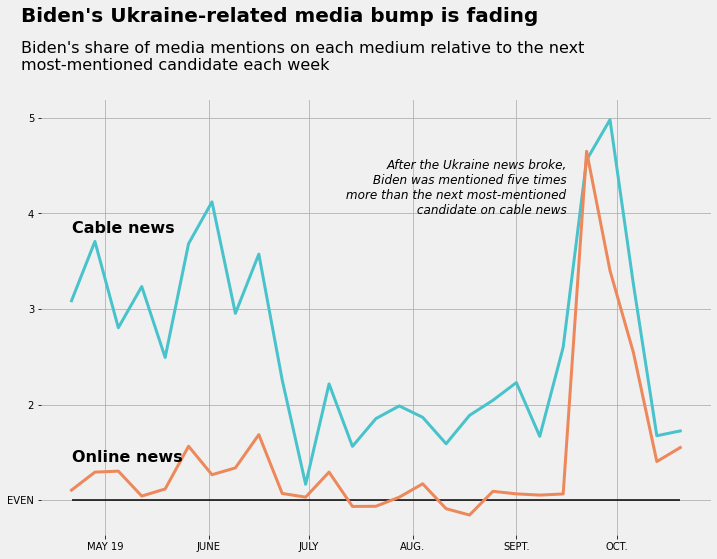

In [18]:
# 2. EDA (1차)
start = df.index.get_loc('2019-04-21')

plt.figure(figsize=(12, 8), facecolor='#F0F0F0')
plt.plot(df.index[start:], df['biden_cable_multiple'][start:], label='Cable News', color='#48C3CB', linewidth=3)
plt.plot(df.index[start:], df['biden_online_multiple'][start:], label='Online News', color='#ED885B', linewidth=3)

# plt.title("Biden's Ukraine-related media bump is fading", loc='left', fontdict={'fontsize' : 20})
plt.text(737155, 6, "Biden's Ukraine-related media bump is fading", fontsize=20, weight='bold')
plt.text(737155, 5.5, "Biden's share of media mentions on each medium relative to the next\nmost-mentioned candidate each week", fontsize=16)
plt.text(df.index[start], 3.8, 'Cable news', fontsize=16, weight='bold')
plt.text(df.index[start], 1.4, 'Online news', fontsize=16, weight='bold')
explain_text_xloc = 737303 + ((737333 - 737303) / 2)
plt.text(explain_text_xloc, 4, 'After the Ukraine news broke,\n Biden was mentioned five times\n more than the next most-mentioned\n candidate on cable news', style='italic', fontsize=12, ha='right')

plt.grid(True)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.hlines(1, df.index[start:], df.index[-1:])

xticks = [737180, 737211, 737241, 737272, 737303, 737333]
yticks = np.arange(1, 6)
plt.xticks(xticks, ['MAY 19', 'JUNE', 'JULY', 'AUG.', 'SEPT.', 'OCT.'])
plt.yticks(yticks, ['EVEN', 2, 3, 4, 5])

gca = plt.gca()
gca.set_facecolor("#F0F0F0")
print(plt.xlim())

plt.show;

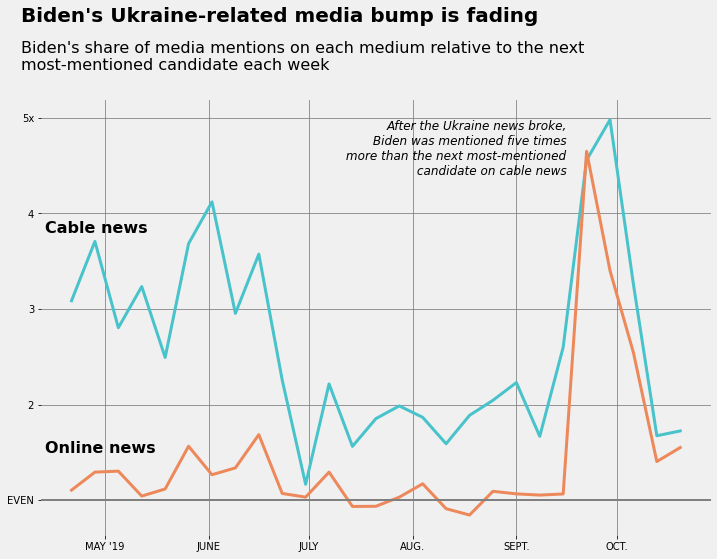

In [66]:
# 2. EDA (2차)
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"]})

start = df.index.get_loc('2019-04-21')

plt.figure(figsize=(12, 8), facecolor='#F0F0F0')
plt.plot('biden_cable_multiple', data=data_for_graph, color='#48C3CB', linewidth=3)
plt.plot('biden_online_multiple', data=data_for_graph, color='#ED885B', linewidth=3)

# plt.suptitle("Biden's Ukraine-related media bump is fading", loc='left', fontdict={'fontsize' : 20})
plt.text(737155, 6, "Biden's Ukraine-related media bump is fading", fontsize=20, weight='bold')
plt.text(737155, 5.5, "Biden's share of media mentions on each medium relative to the next\nmost-mentioned candidate each week", fontsize=16)
plt.text(737162, 3.8, 'Cable news', fontsize=16, weight='bold')
plt.text(737162, 1.5, 'Online news', fontsize=16, weight='bold')
explain_text_xloc = 737303 + ((737333 - 737303) / 2)
plt.text(explain_text_xloc, 4.4, 'After the Ukraine news broke,\n Biden was mentioned five times\n more than the next most-mentioned\n candidate on cable news', style='italic', fontsize=12, ha='right')

plt.grid(True, color='grey')
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.axhline(y=1, color='grey', linewidth=2)

yticks = np.arange(1, 6)
plt.yticks(yticks, ['EVEN', 2, 3, 4, '5x'])

gca = plt.gca()
gca.set_xticklabels(["MAY '19", 'JUNE', 'JULY', 'AUG.', 'SEPT.', 'OCT.'])
gca.set_facecolor("#F0F0F0")

plt.show;